In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Part 1

### a)

In [2]:
G = nx.karate_club_graph()

In [3]:
# number of nodes
N = nx.number_of_nodes(G)
print("Number of nodes: ", N)

# number of links
print("Number of edges: ", nx.number_of_edges(G))

# average degree
print("Average degree: ", sum([d for n, d in G.degree()])/nx.number_of_nodes(G))

# Density
print("Density: ", nx.density(G))

# Global clustering
print("Global clustering: ", nx.transitivity(G))

# Average clustering
print("Average clustering: ", nx.average_clustering(G))

Number of nodes:  34
Number of edges:  78
Average degree:  4.588235294117647
Density:  0.13903743315508021
Global clustering:  0.2556818181818182
Average clustering:  0.5706384782076823


In [4]:
if not nx.is_connected(G):
    print("graph not connected! From now on the largest component will be considered as the graph")  
    G =  G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]).copy()
    
print("Number of nodes of the giant component: ", nx.number_of_nodes(G))

Number of nodes of the giant component:  34


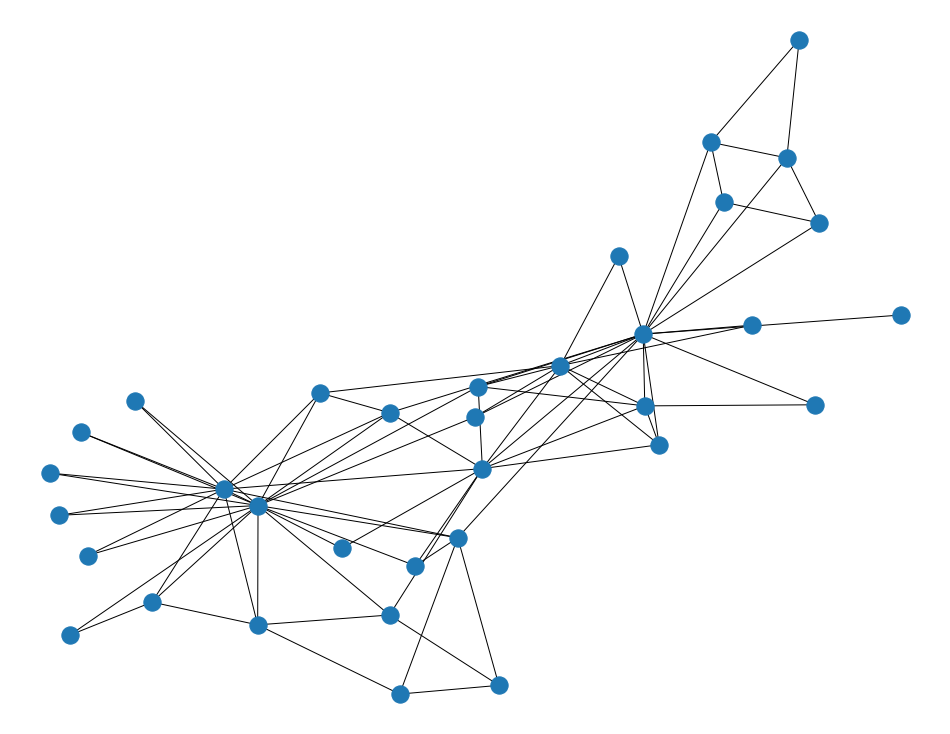

In [5]:
plt.figure( figsize=(13, 10))
nx.draw(G)
plt.show()

In [6]:
def plot_attack(G, network_name):
    
    G_random_attack = G.copy()
    G_betweenness_attack = G.copy()
    G_pagerank_attack = G.copy()
    G_high_dregree_attack = G.copy()

    tot_nodes = nx.number_of_nodes(G)
    f_list = np.arange(0,1.01,1/tot_nodes)

    # BETWEENNESS    
    diameter_list_betweenness = np.zeros(len(f_list))
    giant_component_size_list_betweeness = np.zeros(len(f_list))
    node_removed = 0
    i =0

    while nx.number_of_nodes(G_betweenness_attack) >=2: 
        #find node with highest betweenness
        
        betweenness_dict = nx.betweenness_centrality(G_betweenness_attack)
        max_betweenness_node = max(betweenness_dict, key=betweenness_dict.get)  # Just use 'min' instead of 'max' for minimum.
            ##Remove nodes with highest betweenness
        G_betweenness_attack.remove_node(max_betweenness_node)

        

        if not nx.is_connected(G_betweenness_attack) :
            print("graph not connected! From now on the largest component will be considered as the graph")  
            G_betweenness_attack =  G_betweenness_attack.subgraph( sorted(nx.connected_components(G_betweenness_attack), key=len, reverse=True)[0]).copy()
        
        node_removed += 1

        giant_component_size_list_betweeness[i] = nx.number_of_nodes(G_betweenness_attack)
        diameter_list_betweenness[i] = nx.diameter(G_betweenness_attack)
        i += 1

     # HIGH DEGREE 

    diameter_list_deg = np.zeros(len(f_list))
    giant_component_size_list_deg = np.zeros(len(f_list))
    node_removed = 0
    i =0

    while nx.number_of_nodes(G_high_dregree_attack) >=2: 
        # degree of the nodes
        degree_dict = dict(G_high_dregree_attack.degree)
        # node with highest degree
        max_node_degree = max( degree_dict, key=degree_dict.get)

        #remove node with highest degree
        G_high_dregree_attack.remove_node(max_node_degree)

        if not nx.is_connected(G_high_dregree_attack):
            print("graph not connected! From now on the largest component will be considered as the graph")  
            G_high_dregree_attack =  G_high_dregree_attack.subgraph(sorted(nx.connected_components(G_high_dregree_attack), key=len, reverse=True)[0]).copy()
            
        node_removed += 1

        giant_component_size_list_deg[i] = nx.number_of_nodes(G_high_dregree_attack)
        diameter_list_deg[i] = nx.diameter(G_high_dregree_attack)
        i += 1

    # RANDOM NODE
    diameter_list_random = np.zeros(len(f_list))
    giant_component_size_list_random = np.zeros(len(f_list))
    node_removed = 0
    i =0

    while nx.number_of_nodes(G_random_attack) >=2: 

        #pick random node
        #print(random.randint(0, len(G_random_attack.nodes)-1 ) )
        nodes_list = list(G_random_attack.nodes)
        random_node = nodes_list[ random.randint(0,  len(G_random_attack.nodes)-1) ]
        #remove random node
        G_random_attack.remove_node(random_node)

        if not nx.is_connected(G_random_attack):
            print("graph not connected! From now on the largest component will be considered as the graph")  
            G_random_attack =  G_random_attack.subgraph(sorted(nx.connected_components(G_random_attack), key=len, reverse=True)[0]).copy()
            
        node_removed += 1

        giant_component_size_list_random[i] = nx.number_of_nodes(G_random_attack)
        diameter_list_random[i] = nx.diameter(G_random_attack)
        i += 1
    #PAGERANK
    
    diameter_list_pagerank = np.zeros(len(f_list))
    giant_component_size_list_pagerank = np.zeros(len(f_list))
    node_removed = 0
    i = 0

    while nx.number_of_nodes(G_pagerank_attack) >=2: 
        # computing page rank
        pageRank_dict = nx.pagerank(G_pagerank_attack)

        #pick the node di maximun pagerank
        max_pageRank_idx = max(pageRank_dict, key=pageRank_dict.get)  # Just use 'min' instead of 'max' for minimum.

        #remove the node with highest pagerank
        G_pagerank_attack.remove_node(max_pageRank_idx)

        if not nx.is_connected(G_pagerank_attack):
            print("graph not connected! From now on the largest component will be considered as the graph")  
            G_pagerank_attack =  G_pagerank_attack.subgraph(sorted(nx.connected_components(G_pagerank_attack), key=len, reverse=True)[0]).copy()
            
        node_removed += 1
        giant_component_size_list_pagerank[i] = nx.number_of_nodes(G_pagerank_attack)
        diameter_list_pagerank[i] = nx.diameter(G_pagerank_attack)
        i += 1



        #plot giant component size

    plt.figure( figsize=(15,10))

    plt.plot(f_list, giant_component_size_list_betweeness/tot_nodes, label="Betweenness Attack", lw=3)
    plt.plot(f_list, giant_component_size_list_random/tot_nodes, label="Random Node Attack", lw=3)
    plt.plot(f_list, giant_component_size_list_deg/tot_nodes, label="High Degree Node Attack", lw=3)
    plt.plot(f_list, giant_component_size_list_pagerank/tot_nodes, label="Pagerank Attack", lw=3)

    plt.xlabel("f", fontsize=15)
    plt.ylabel("Giant Component Size ( fraction ) ", fontsize=15)
    plt.title("Karate Club", fontsize=20)
    plt.legend(fontsize=15)
    plt.savefig("images/"+network_name+"_giant_component_size.png")


    plt.figure( figsize=(15,10))

    plt.plot(f_list, diameter_list_betweenness, label="Betweenness Attack", lw=3)
    plt.plot(f_list, diameter_list_random, label="Random Node Attack", lw=3)
    plt.plot(f_list, diameter_list_deg, label="High Degree Node Attack", lw=3)
    plt.plot(f_list, diameter_list_pagerank, label="Pagerank Attack", lw=3)

    plt.xlabel("f", fontsize=15)
    plt.ylabel("Diameter ", fontsize=15)
    plt.title("Karate Club", fontsize=20)
    plt.legend(fontsize=15)
    plt.savefig("images/"+network_name+"_diameter.png")


graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the largest component will be considered as the graph
graph not connected! From now on the larges

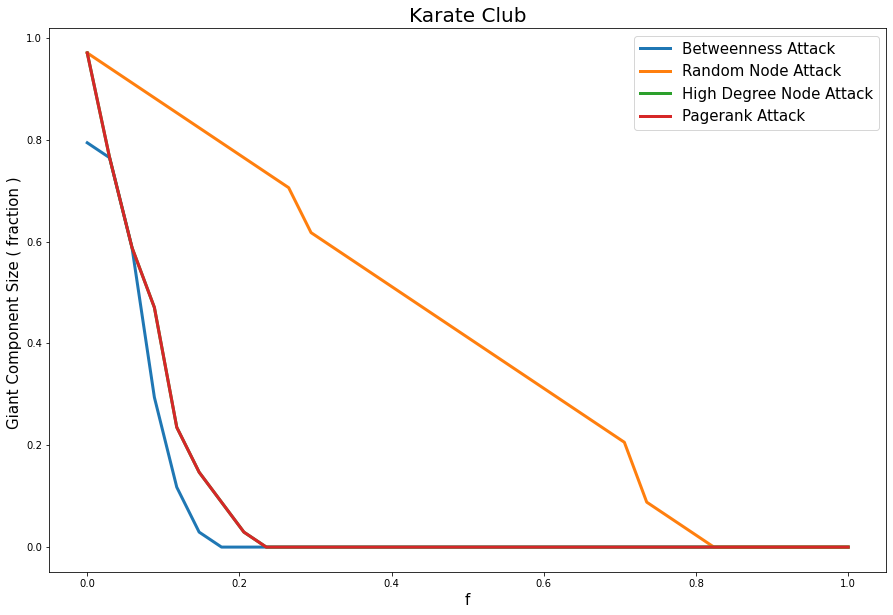

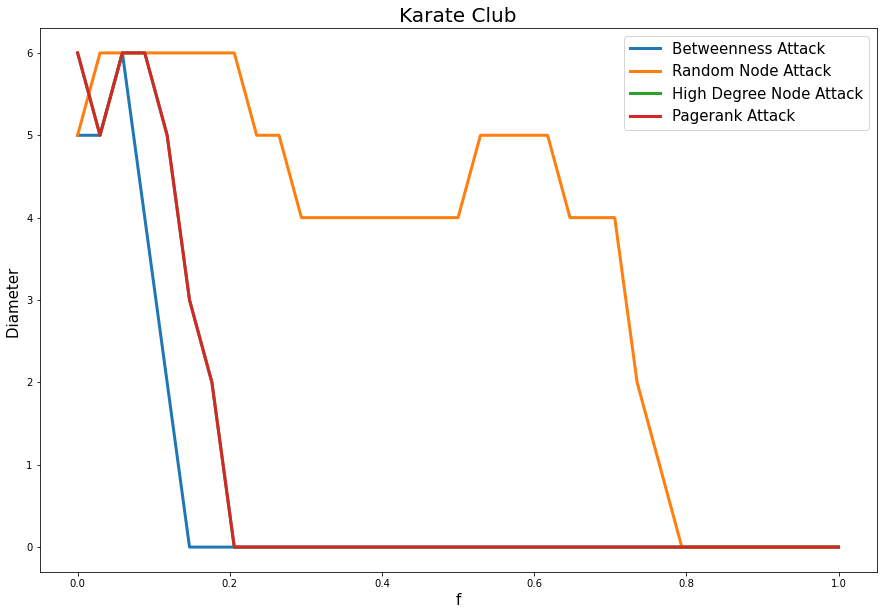

In [7]:
plot_attack(G, "Karate Club")

# Part 2